# **CSE 5520 Fall 2024: Homework 6 - Visualization of KDE**

This homework is to help you practice with some data visualization fundamentals. You are
expected to use these visualization techniques and others in your final project. You are required
to do this exercise in Python. **All plots/graphs must have titles and x-y coordinate tick labels.**

### **KDE using Dash**
This part is to help you get started with your term project by gently introducing Dashboard
creation. You were given a template code that creates a Dashboard webpage. Use the uploaded
covid-19 data sets.

**Step 1.** Using the data set, create histograms of USA’s total cases of covid-19 at 3 different bin
sizes (bin-size=10, 20, 30)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\mso21001\AppData\Local\Temp\ipykernel_24356\3946600266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['date'] = pd.to_datetime(usa_data['date'])


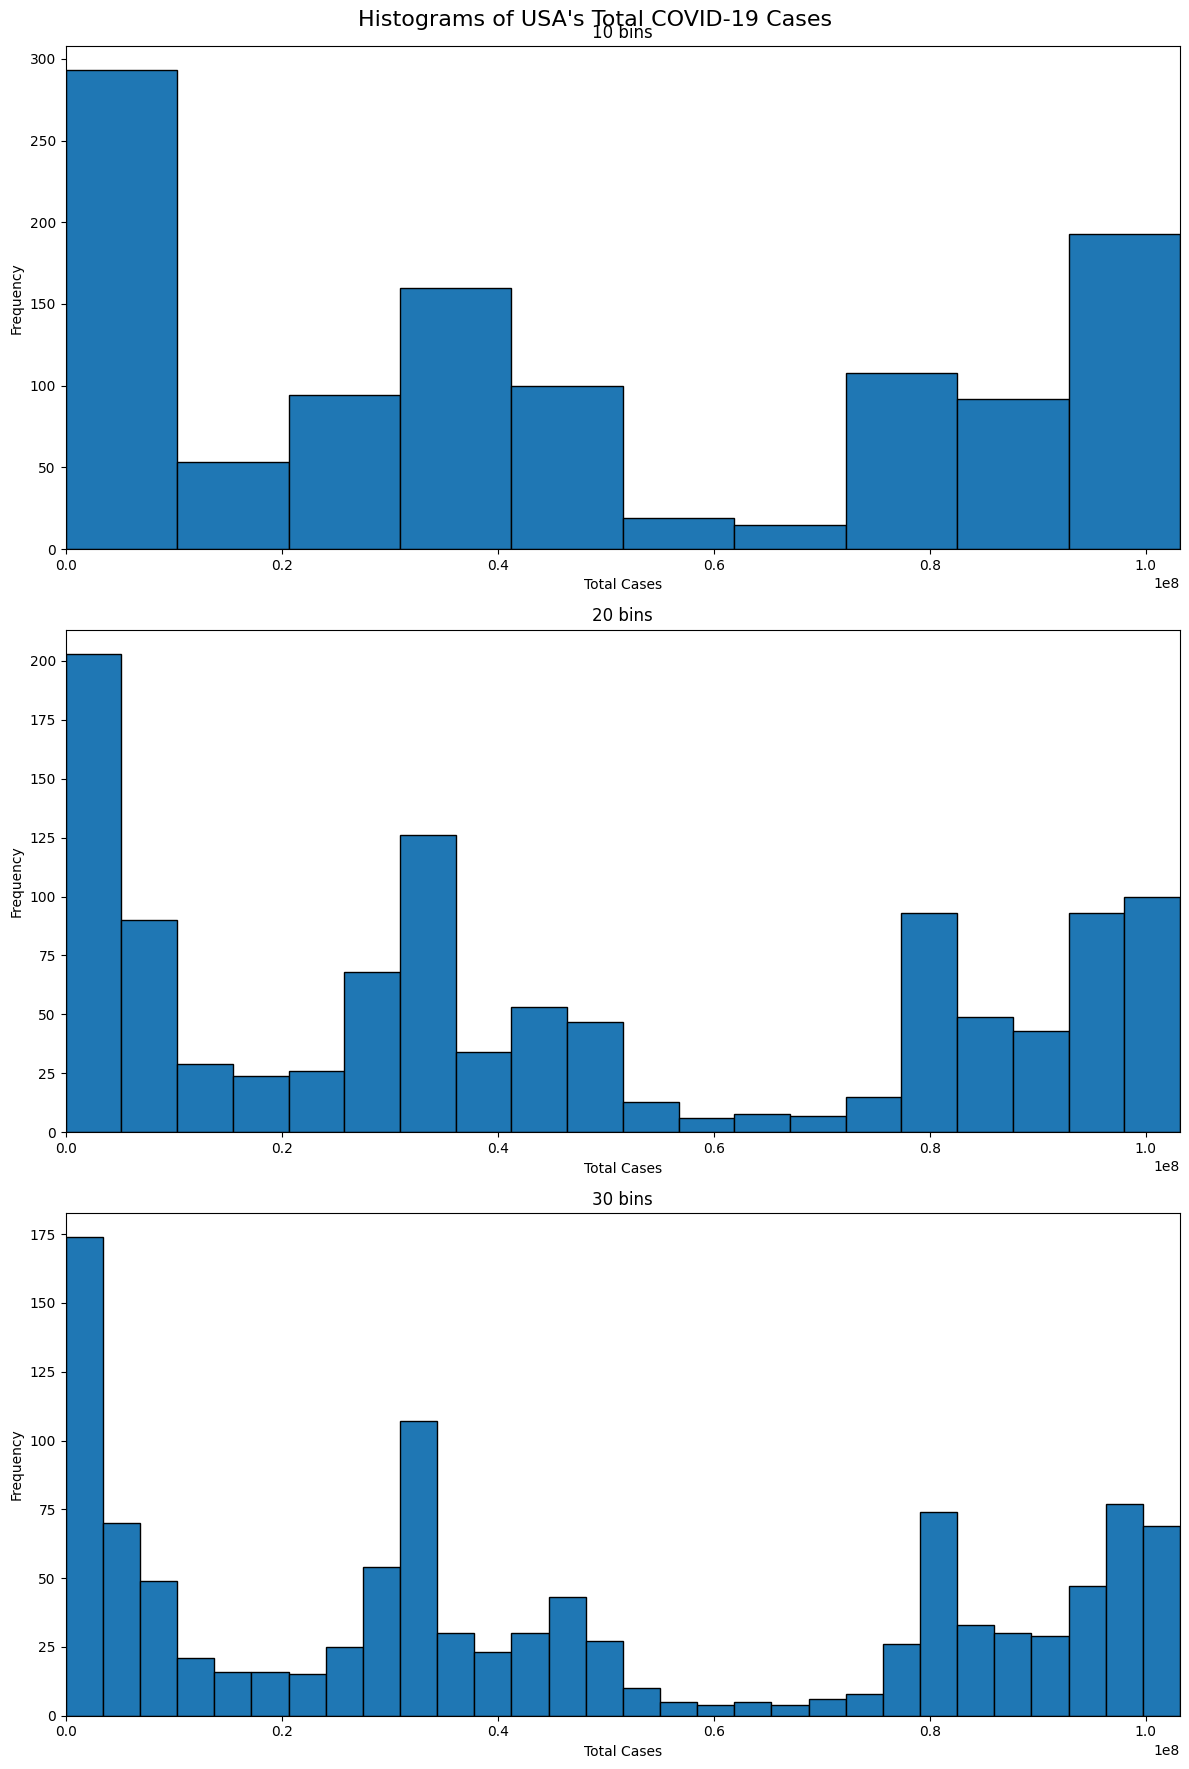

Number of data points: 1127
Date range: from 2020-01-22 00:00:00 to 2023-02-21 00:00:00
Total cases range: from 1.0 to 103168534.0


In [9]:
# Load Database, do initial filtering
df = pd.read_csv('Covid19-data.csv')

usa_data = df[df['location'] == 'United States']

# Sort by date and get the latest total cases
usa_data['date'] = pd.to_datetime(usa_data['date'])
usa_data = usa_data.sort_values('date')
total_cases = usa_data['total_cases']
latest_total_cases = usa_data['total_cases'].iloc[-1]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Histograms of USA's Total COVID-19 Cases", fontsize=16)
bins_10 = np.linspace(0, latest_total_cases, 11)
bins_20 = np.linspace(0, latest_total_cases, 21)
bins_30 = np.linspace(0, latest_total_cases, 31)


ax1.hist(usa_data['total_cases'], bins=bins_10, edgecolor='black')
ax1.set_title('10 bins')
ax1.set_xlabel('Total Cases')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, latest_total_cases)

ax2.hist(usa_data['total_cases'], bins=bins_20, edgecolor='black')
ax2.set_title('20 bins')
ax2.set_xlabel('Total Cases')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, latest_total_cases)

ax3.hist(usa_data['total_cases'], bins=bins_30, edgecolor='black')
ax3.set_title('30 bins')
ax3.set_xlabel('Total Cases')
ax3.set_ylabel('Frequency')
ax3.set_xlim(0, latest_total_cases)

plt.tight_layout()
plt.show()

print(f"Number of data points: {len(usa_data)}")
print(f"Date range: from {usa_data['date'].min()} to {usa_data['date'].max()}")
print(f"Total cases range: from {usa_data['total_cases'].min()} to {usa_data['total_cases'].max()}")

**Step 2.** Apply Kernel Density Estimation (KDE) to convert your histogram into a KDE plot.
Practice with various bandwidths (bw = 0.01, 0.1, 0.2, 0.4) that contrast impact of using different
bandwidth.

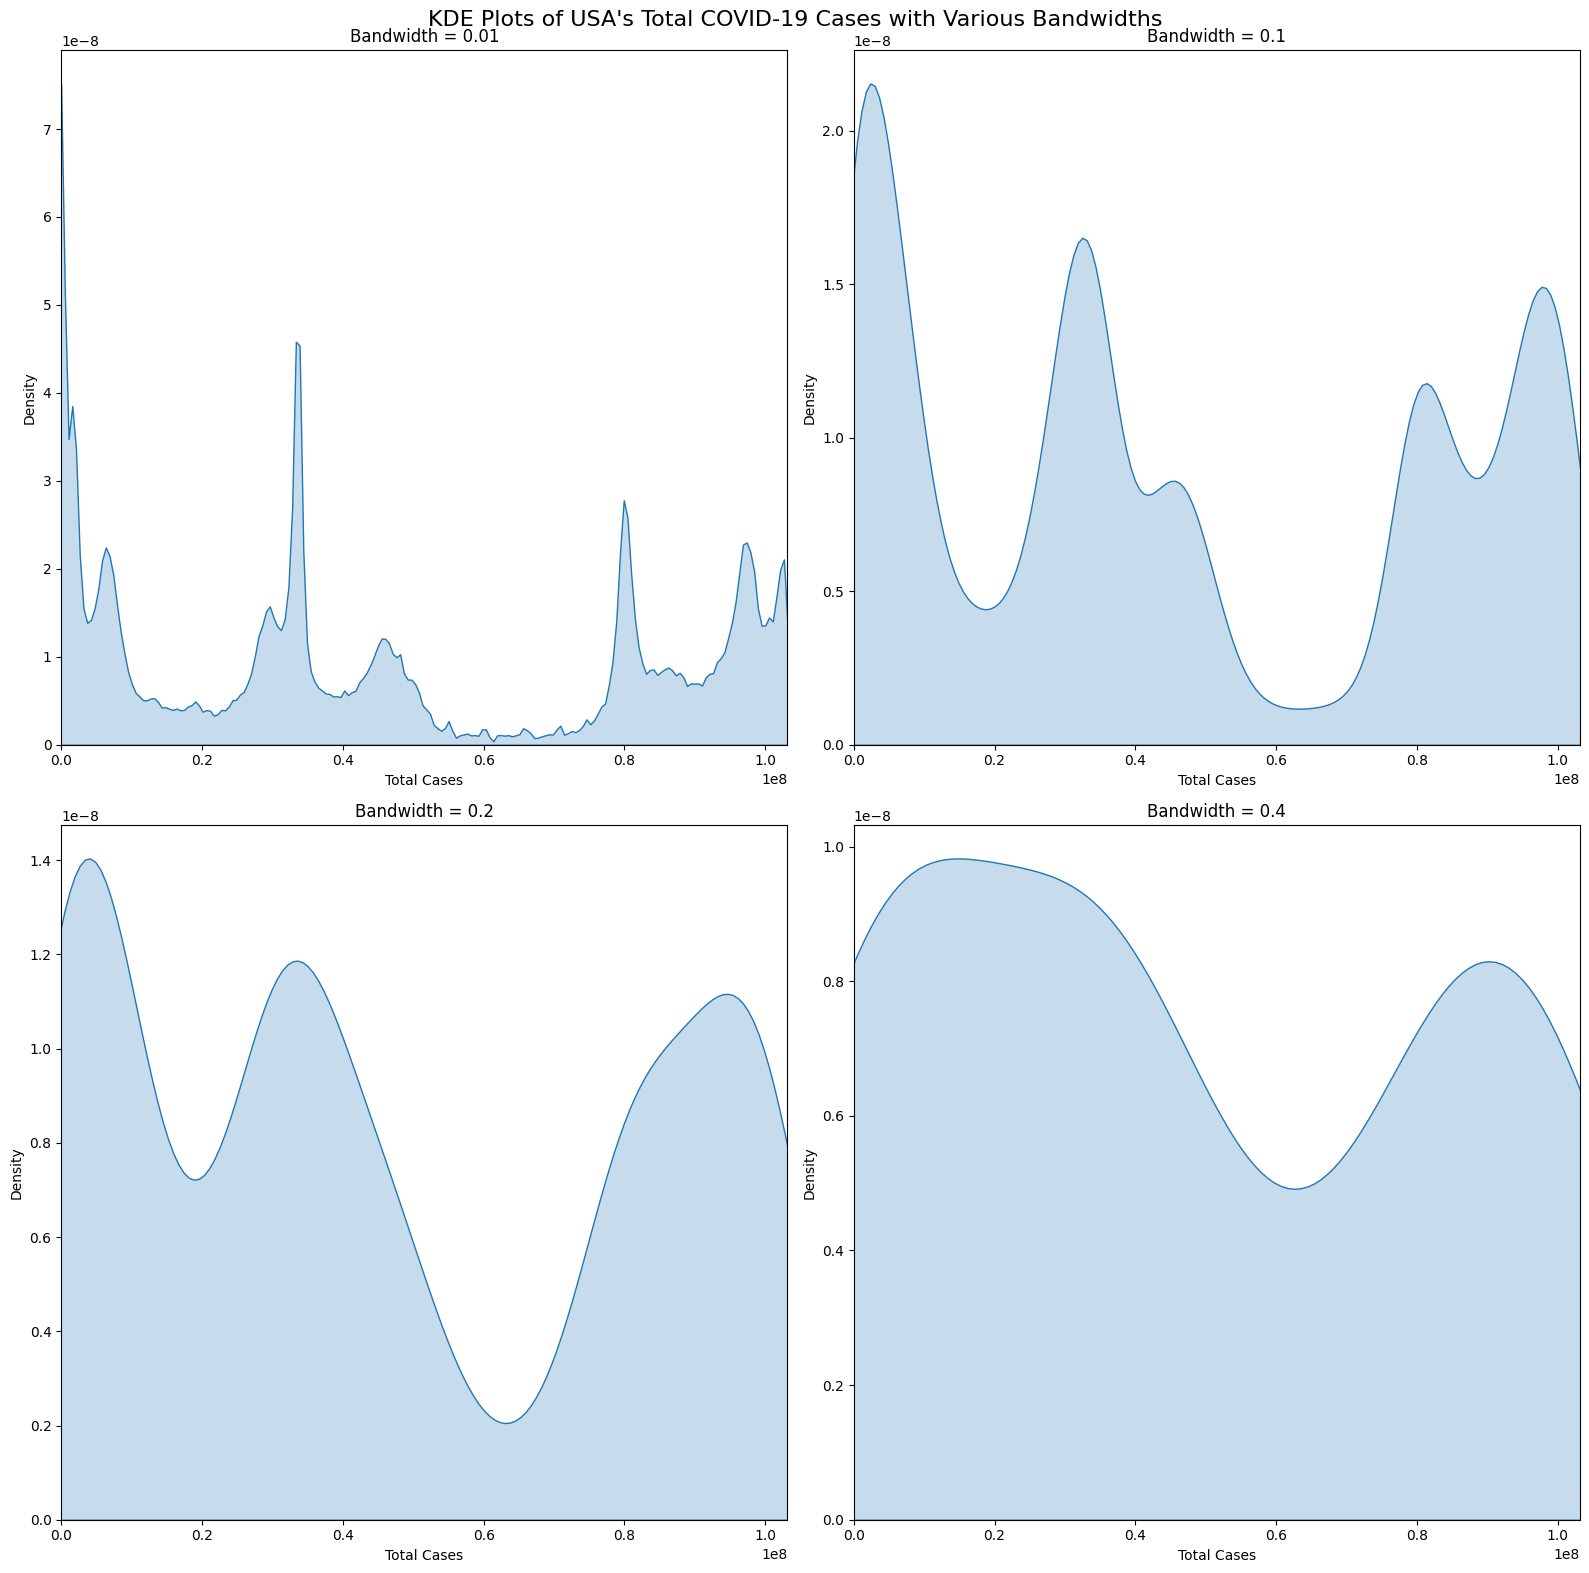

Number of data points: 1127
Date range: from 2020-01-22 00:00:00 to 2023-02-21 00:00:00
Total cases range: from 1.0 to 103168534.0


In [13]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle("KDE Plots of USA's Total COVID-19 Cases with Various Bandwidths", fontsize=16)

# List of axes and bandwidths
axes = [ax1, ax2, ax3, ax4]
bandwidths = [0.01, 0.1, 0.2, 0.4]

# Create KDE plots with different bandwidths
for ax, bw in zip(axes, bandwidths):
    sns.kdeplot(data=total_cases, bw_method=bw, ax=ax, fill=True)
    ax.set_title(f'Bandwidth = {bw}')
    ax.set_xlabel('Total Cases')
    ax.set_ylabel('Density')
    ax.set_xlim(0, total_cases.max())

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of data points: {len(usa_data)}")
print(f"Date range: from {usa_data['date'].min()} to {usa_data['date'].max()}")
print(f"Total cases range: from {total_cases.min()} to {total_cases.max()}")

**Step 3.** Create a simple Dashboard that allows the user to choose multiple (minimum three)
different KDE plots using a design similar to the one given below. Note that the panel on the
leftmost is to enable user to choose different histogram bin sizes/bandwidths. KDE plot should
change based on the choices. The picture given below is only for illustration purpose. You can
have your own design. In providing bandwidth options, make it obvious that your system
suggests bandwidths calculated based on “rule of thumb” discussed in class. There are multiple
ways you can indicate which ones are suggested ones based on “rule of thumb” (e.g., annotate
bandwidths with **“Recommended 1”** and **“Recommended 2.**). Capture the web browser that
contains your displays.

In [15]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from scipy import stats

def scotts_rule(data):
    return np.power(data.size, -1/5) * np.std(data)

def silvermans_rule(data):
    return (0.9 * min(np.std(data), stats.iqr(data)/1.34)) * np.power(data.size, -1/5)

scott_bw = scotts_rule(total_cases)
silverman_bw = silvermans_rule(total_cases)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("USA COVID-19 Total Cases KDE Dashboard"),
    html.Div([
        html.Div([
            html.H3("Bandwidth Selection"),
            dcc.Checklist(
                id='bandwidth-checklist',
                options=[
                    {'label': f'Scott\'s Rule (Recommended 1): {scott_bw:.4f}', 'value': scott_bw},
                    {'label': f'Silverman\'s Rule (Recommended 2): {silverman_bw:.4f}', 'value': silverman_bw},
                    {'label': 'Custom Bandwidth 1: 0.01', 'value': 0.01},
                    {'label': 'Custom Bandwidth 2: 0.1', 'value': 0.1},
                    {'label': 'Custom Bandwidth 3: 0.2', 'value': 0.2},
                    {'label': 'Custom Bandwidth 4: 0.4', 'value': 0.4},
                ],
                value=[scott_bw, silverman_bw, 0.1]  # Default selected values
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'vertical-align': 'top'}),
        html.Div([
            dcc.Graph(id='kde-plot')
        ], style={'width': '70%', 'display': 'inline-block'})
    ])
])

# Define the callback to update the graph
@app.callback(
    Output('kde-plot', 'figure'),
    [Input('bandwidth-checklist', 'value')]
)
def update_graph(selected_bandwidths):
    traces = []
    for bw in selected_bandwidths:
        kde = stats.gaussian_kde(total_cases, bw_method=bw)
        x_range = np.linspace(0, total_cases.max(), 1000)
        y_kde = kde(x_range)
        traces.append(go.Scatter(x=x_range, y=y_kde, mode='lines', name=f'BW: {bw:.4f}'))

    return {
        'data': traces,
        'layout': go.Layout(
            title='KDE of USA COVID-19 Total Cases',
            xaxis={'title': 'Total Cases'},
            yaxis={'title': 'Density'},
            hovermode='closest'
        )
    }

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Step 4.** By using a Jupyter markdown cell, provide a brief explanation for how to use your
visualization tool. It should be brief. This is just to report your design decisions in creating your
visualization framework. Ideally a good visualization web app should be so obvious that no
instruction for how to use it other than meaningful titles/labels for the components. 

Dashboard Layout:

Left panel: Bandwidth selection options
Right panel: KDE plot display


Bandwidth Selection:
Use the checklist to select one or more bandwidths
Two recommended options are clearly labeled:
"Scott's Rule (Recommended 1)"
"Silverman's Rule (Recommended 2)"


Four additional custom bandwidths are available
KDE Plot:
Updates automatically based on selected bandwidths
X-axis: Total COVID-19 cases
Y-axis: Density
Each selected bandwidth is represented by a different colored line